# Introduction to Python for quantitative finance.


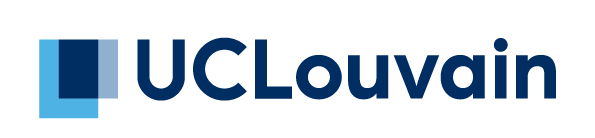



*Author* : Ubeydullah Ozcan

# Course 2 - Data analysis, optimization (intro) and visulization

During this second course, the focus will be on analysis how to analyze a financial dataset like a evolution of a stock through time. Some metrics will be calculated like mean, variance, return, covariance matrix etc ...

An introduction to data visualization will be given using **matplotlib** packages in order to create great visual.

## 2.1 Import data
Let's start be importing a financial dataset from a web browser and multiple stocks.
Imagine that we want to analyze a portfolio of 4 stocks which are **ceva**, **yahoo**, **tesla** and **zom** for the entire 2020 year. Let's start by import them all.

We need 3 packages to import :

In [50]:
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import yfinance as yf
import plotly.express as px

Let's define the starting date and ending date

In [25]:
import yfinance as yf

# Set the start and end date
start_date = '2020-01-01'
end_date = '2022-01-01'

# Set the ticker
ticker = 'GOOGL'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
data.Close

[*********************100%***********************]  1 of 1 completed


Date
2020-01-02     68.433998
2020-01-03     68.075996
2020-01-06     69.890503
2020-01-07     69.755501
2020-01-08     70.251999
                 ...    
2021-12-27    147.906494
2021-12-28    146.686996
2021-12-29    146.654999
2021-12-30    146.200500
2021-12-31    144.852005
Name: Close, Length: 505, dtype: float64

In [95]:
start_date = datetime.datetime(2022,1,1)
end_date = datetime.datetime(2023,12,31)
stocks = ['CEVA', 'GOOGL', 'TSLA', 'ZOM']

In order to work properly, let's start by creating a function which will import all closing price of all stocks that we want and for a period that we define :

In [96]:
def Import_stock_price(name, start, end):
    ptf = pd.DataFrame()
    for i in name:
        ptf = pd.concat([ptf, pd.DataFrame(yf.download(i, start, end)["Close"])], axis = 1)
    ptf.columns = name
    ptf = ptf
    return(ptf)

In [97]:
Ptf = Import_stock_price(name = stocks, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [98]:
Ptf.head()

,CEVA,GOOGL,TSLA,ZOM
Date,,,,
2022-01-03,45.509998,144.991501,399.926666,0.357
2022-01-04,44.430000,144.399506,383.196655,0.350
2022-01-05,40.900002,137.774994,362.706665,0.328
2022-01-06,40.689999,137.747498,354.899994,0.321
2022-01-07,38.939999,137.016998,342.320007,0.320


Now we have our portfolio, let's start with the data analysis part.

## 2.2 Data Analysis

Let's start by calculating some easy metrics like the average and the variance of the stocks price

## 2.2.1 Price analysis and plots
Here is an introduction. For more information, I advice you to have a look on this website :
https://matplotlib.org/stable/index.html

In [99]:
np.mean(Ptf["CEVA"])

33.04221477764565

In [100]:
math.sqrt(np.var(Ptf["CEVA"]))

4.746854965195998

### Plot using ***matplotlib***

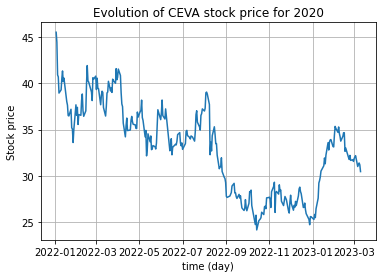

In [101]:
x = Ptf.index.values
y = Ptf["CEVA"]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='time (day)', ylabel='Stock price',
       title='Evolution of CEVA stock price for 2020')
ax.grid()

plt.show()

### Plot using **plotly**

In [102]:
Date = Ptf.index.values
fig = px.line(Ptf, x=Date, y=stocks)
fig.show()

In [103]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=2, cols=2,  subplot_titles=("CEVA", "GOOGLE", "TESLA", "ZOOM"))

fig.add_trace(go.Scatter(x= Date, y=Ptf.CEVA),
              row=1, col=1)

fig.add_trace(go.Scatter(x= Date, y=Ptf.GOOGL),
              row=1, col=2)

fig.add_trace(go.Scatter(x= Date, y=Ptf.TSLA),
              row=2, col=1)

fig.add_trace(go.Scatter(x= Date, y=Ptf.ZOM),
              row=2, col=2)

fig.update_layout(showlegend=False)

fig.show()

### 2.2.2 Calculation of return, log-return, fit distribution and plots
$$ R_t = (1 + r_t) = \frac{p_t}{p_{t-1}} $$

$$ ln(R_t) = ln\left(\frac{p_t}{p_{t-1}}\right) $$

In [104]:
returns = Ptf/Ptf.shift(1)
returns = returns.dropna()
returns

,CEVA,GOOGL,TSLA,ZOM
Date,,,,
2022-01-04,0.976269,0.995917,0.958167,0.980392
2022-01-05,0.920549,0.954124,0.946529,0.937143
2022-01-06,0.994865,0.999800,0.978477,0.978659
2022-01-07,0.956992,0.994697,0.964553,0.996885
2022-01-10,1.008988,1.012061,1.030342,0.990625
...,...,...,...,...
2023-03-06,0.963642,1.015803,0.979878,0.965251
2023-03-07,1.005805,0.986650,0.968526,0.996000
2023-03-08,1.006412,1.004155,0.969581,1.020080


Notice that, in Python (and many other languages) the function "log" is the natural logarithme which is log with base "e". np.log() in python is ln()

In [105]:
import math
np.log(math.exp(1))

1.0

In [106]:
l_returns = np.log(returns)
l_returns

,CEVA,GOOGL,TSLA,ZOM
Date,,,,
2022-01-04,-0.024017,-0.004091,-0.042733,-0.019803
2022-01-05,-0.082785,-0.046962,-0.054954,-0.064920
2022-01-06,-0.005148,-0.000200,-0.021758,-0.021572
2022-01-07,-0.043960,-0.005317,-0.036090,-0.003120
2022-01-10,0.008948,0.011988,0.029891,-0.009419
...,...,...,...,...
2023-03-06,-0.037035,0.015680,-0.020328,-0.035367
2023-03-07,0.005788,-0.013440,-0.031980,-0.004008
2023-03-08,0.006392,0.004147,-0.030892,0.019881


In [110]:
l_returns.mean()

CEVA    -0.001352
GOOGL   -0.001582
TSLA    -0.002813
ZOM     -0.001437
dtype: float64

In [111]:
l_returns.std()

CEVA     0.030906
GOOGL    0.024539
TSLA     0.042518
ZOM      0.050249
dtype: float64

In [112]:
l_returns.var()

CEVA     0.000955
GOOGL    0.000602
TSLA     0.001808
ZOM      0.002525
dtype: float64

In [115]:
np.cov(l_returns, rowvar = False)

array([[0.00095515, 0.00045098, 0.00072184, 0.00061196],
       [0.00045098, 0.00060216, 0.00052617, 0.00043734],
       [0.00072184, 0.00052617, 0.00180779, 0.00078316],
       [0.00061196, 0.00043734, 0.00078316, 0.00252494]])

In [128]:
fig = px.line(l_returns, x=l_returns.index, y=('GOOGL'), title= f"""Log-Return of GOOGLE stock from {start_date} and {end_date}""")
fig.show()

In [129]:
dist = getattr(stats, 'norm')
parameters = dist.fit(l_returns['CEVA'])
print(parameters)

(-0.0013519115412019167, 0.030853429253422774)


In [130]:
m = parameters[0]
std = parameters[1]

In statistics, the Kolmogorov-Smirnov test is a hypothesis test used to determine whether a sample indeed follows a given law known by its continuous distribution function, or whether two samples follow the same law.

In [131]:
stats.kstest(l_returns['CEVA'], "norm", parameters)

KstestResult(statistic=0.041080119546191396, pvalue=0.6821651370349915)

In [132]:
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as ss

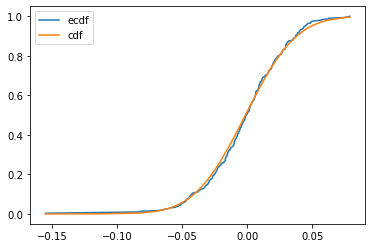

In [133]:
ecdf = ECDF(l_returns['CEVA'])
y_cdf = ss.norm.cdf(ecdf.x, m, std) 
plt.plot(ecdf.x, ecdf.y, label = "ecdf")
plt.plot(ecdf.x, y_cdf, label='cdf')
plt.legend();

How to interpret this result ? 

The null hypothesis of Kolmogorov-Smirnov test suppose that the distribution of the sample follow the same distribution of a known continuous distribution. In our case, we test the fact that the log-return of a stock follow a normal distribution.

Let's put a significant level at 5\%. if P-Value of the test is less than 5\%, we reject the null hypothesis. And if the P-Value if higher than 5\%, we do not reject the null hypothesis.  

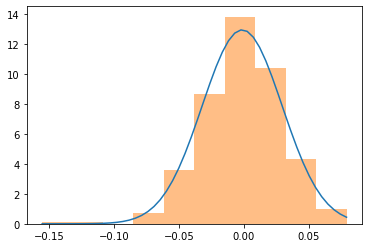

In [134]:
domain = np.linspace(np.min(l_returns['CEVA']), np.max(l_returns['CEVA']))
plt.plot(domain, norm.pdf(domain, m, std))
plt.hist(l_returns["CEVA"], alpha = .5, density = True)
plt.show()

### 2.2.3 Summarise data

In [135]:
df = pd.read_csv("Data/training.csv")
len(df)

228216

In [136]:
df2 = df[df["claim_amount"] > 0]
df2

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,...,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
14,PL042479,1.0,0.000,Max,5,2,Biannual,No,WorkPrivate,M,...,zspzyfdefowgwddf,5.0,Diesel,Tourism,200.0,25000.0,1300.0,320.0,58.3,339.84
15,PL042480,1.0,0.000,Max,27,3,Yearly,No,Retired,F,...,hselphnqlvecmmyx,1.0,Diesel,Tourism,158.0,13390.0,885.0,530.0,385.6,1236.00
20,PL042488,1.0,0.428,Med2,4,4,Biannual,No,Retired,M,...,iwhqpdfuhrsxyqxe,12.0,Diesel,Commercial,150.0,14159.0,1193.0,460.0,245.2,209.98
31,PL042548,1.0,0.000,Max,2,2,Biannual,No,Professional,F,...,demgvtbzilochupd,4.0,Gasoline,Tourism,160.0,2088.0,0.0,960.0,701.5,224.33
45,PL042474,1.0,0.000,Max,26,2,Biannual,No,WorkPrivate,F,...,aywlgifrijfokyzu,1.0,Diesel,Tourism,182.0,11785.0,1080.0,1290.0,49.8,1343.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228169,PL064692,4.0,0.000,Max,5,5,Yearly,No,Professional,F,...,iwhqpdfuhrsxyqxe,7.0,Diesel,Commercial,150.0,14159.0,1193.0,1470.0,476.1,257.05
228187,PL051449,4.0,0.000,Max,6,6,Monthly,No,WorkPrivate,M,...,swjkmyqytzxjwgag,19.0,Gasoline,Tourism,175.0,23900.0,1285.0,280.0,463.7,53.18
228190,PL052239,4.0,0.225,Med2,9,5,Biannual,No,WorkPrivate,M,...,zoypfizhpbtpjwpv,15.0,Gasoline,Tourism,145.0,10896.0,660.0,90.0,158.4,194.14
228196,PL055078,4.0,0.000,Max,19,5,Yearly,No,WorkPrivate,M,...,gfhjqtkgvomiygvx,8.0,Gasoline,Tourism,139.0,11985.0,1264.0,250.0,745.4,1276.00


In [137]:
len(df2)

23292

In [139]:
fig = px.histogram(df2, x="drv_age1")
fig.show()


In [140]:
df2.groupby("pol_coverage").size().reset_index(name='counts')

,pol_coverage,counts
0,Max,18313
1,Med1,1462
2,Med2,3094
3,Min,423


In [141]:
df_polcov = df2.groupby("pol_coverage").agg({'claim_amount' : ['sum', 'mean']})
df_polcov

claim_amount             
                      sum         mean
pol_coverage                          
Max           22078455.93  1205.616553
Med1           1051586.30   719.279275
Med2           2442219.43   789.340475
Min             485726.42  1148.289409

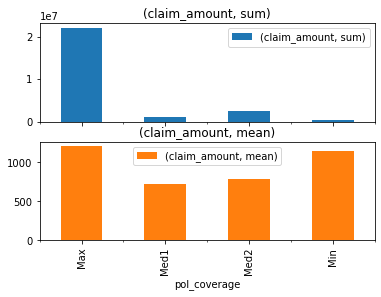

In [142]:
df_polcov.plot(subplots = True, use_index = True, kind = 'bar');

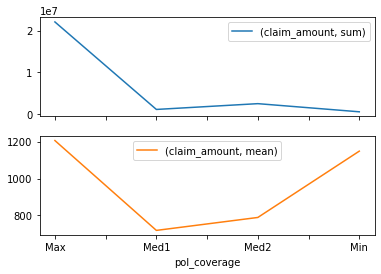

In [143]:
df_polcov.plot(subplots = True, use_index = True);

## 2.3 Optimization

One of the most imporant topic that you should be aware is the is about optimization. In fact, minimize, maximize or finding roots of a function an important task that could be easily handle in Python. Let's imagine that we have a function in this format (here is the documentation about optimization in Python (https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#nelder-mead-simplex-algorithm-method-nelder-mead) :

$$ f(x) = \sum_{i = 1}^{N-1} 100 (x_{i+1} - x_i^2)^{2} + (1-x_i)^2 $$

In [33]:
import numpy as np
from scipy.optimize import minimize

In [34]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [35]:
x0 = np.array([1.3, 0.7, 0.8])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 150
         Function evaluations: 270


In [36]:
print(res.x)

[1. 1. 1.]


In [37]:
rosen(np.array([1, 1, 1]))

0.0

# Exercice ! 

## 1) Data analysis

For this exercice, I'm excepting from you to (at least) reproduce the data analysis that we have done together (2.1 and 2.2). 
**BUT**, I want one function that do all the analysis and return all the result.
In other word, I want a function in which you put the stocks label ("AAPL") and that will the analysis on this one. If I put multiple label, I want the analysis of the portfolio. Graph can be done outside the function (or as an output of the function, as you want).

If you have some idea to increase the analysis, feel free to implement it :)


## 2) Optimization

Here a simple function :
$$ f(x,y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2 $$
It's a 3 dimension function that we called "Beale function". I want you to calculate the global minimum of this function.
To help you a bit : the domain of reseach is $-4.5 \leq x,y \leq 4.5$. 
And the global minimum that you are looking is $x = 3 $ and $y = 0.5$ which gives $f(3, 0.5) = 0$. 
Please verify this solution  

## 3) Solve and plot quadratic function

As now you know how to solve a quadratic function from the course 1, now I want you to plot a quadratic function $f(x) = ax^2 + bx + c$ and highlight the roots with point(s).